In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

### Plot Confusion Matrices

In [2]:
valid_phones = ['ao', 'ae', 'r', 'eh', 't', 'b', 'aa', 'f', 'k', 'ng', 's', 'g', 'ow', 'er', 'l', 'th', 'z', 'aw', 'd', 'dh', 'sh', 'hh', 'iy', 'ch', 'm', 'ey', 'v', 'y', 'zh', 'jh', 'p', 'uw', 'ah', 'w', 'n', 'oy', 'ay', 'ih', 'uh']

In [15]:
def plot_confusion_matrix(layer, accent):
    f = open('confusion_{}_{}.json'.format(layer,accent), 'r+')
    confusion = json.load(f)
    conf_list = np.zeros((39,39), dtype= float)
    for k,v in confusion.items():
        #print(k)
        for p, val in v.items():
        #print(k,p,val)
        #print(valid_phones.index(k),valid_phones.index(p))
            conf_list[valid_phones.index(k)][valid_phones.index(p)] = val
    row_sums = conf_list.sum(axis = 1)
    normalized_conf  = conf_list / row_sums[:, np.newaxis]
#cmap = mpl.cm.ScalarMappable(cmap=mpl.cm.Blues)
    classNames = valid_phones
    tick_marks = np.arange(len(classNames))
    fig = plt.figure(figsize = (10,10))
    plt.xticks(tick_marks, classNames, rotation = 45,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    plt.imshow(normalized_conf, cmap=mpl.cm.Reds)
    #plt.colorbar()
    plt.clim(0,1)
    plt.title('Confusion Matrix for layer: {} , Accent: {}'.format(layer.upper(),accent.capitalize()), fontsize=16)
    plt.savefig('../../Final Submission/confusion/png/Conf_{}_{}.png'.format(layer,accent))
    plt.show()
        
    
    

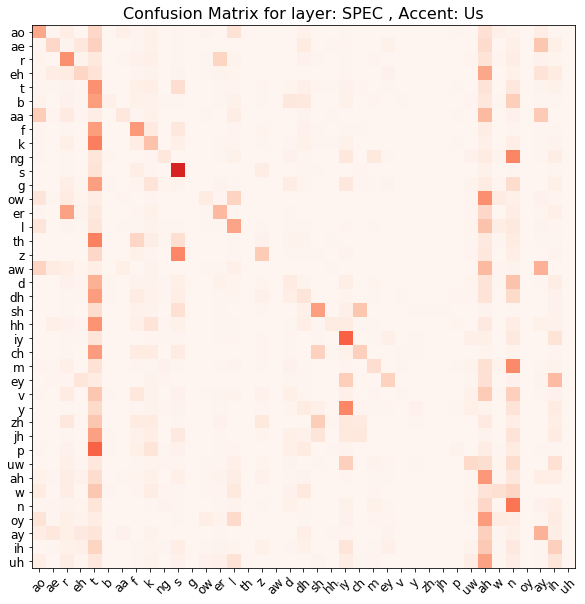

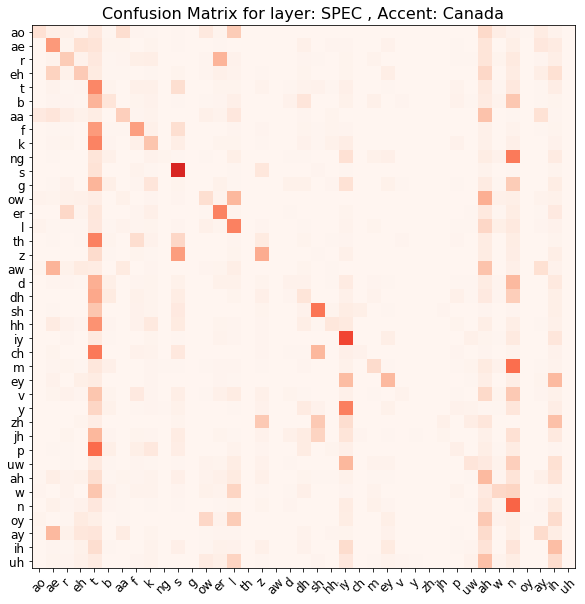

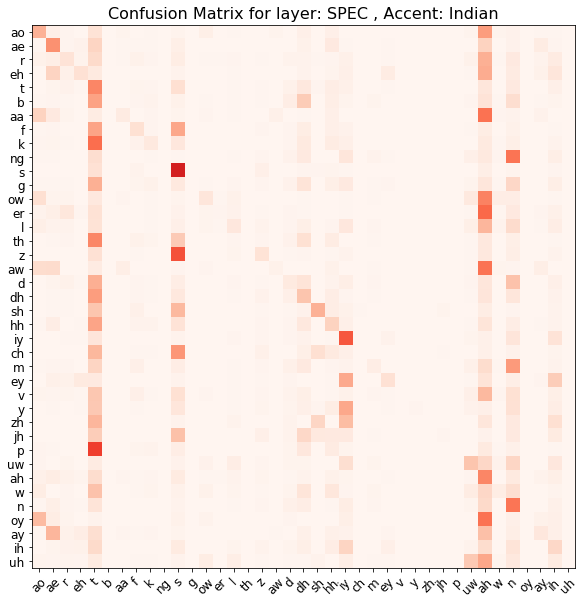

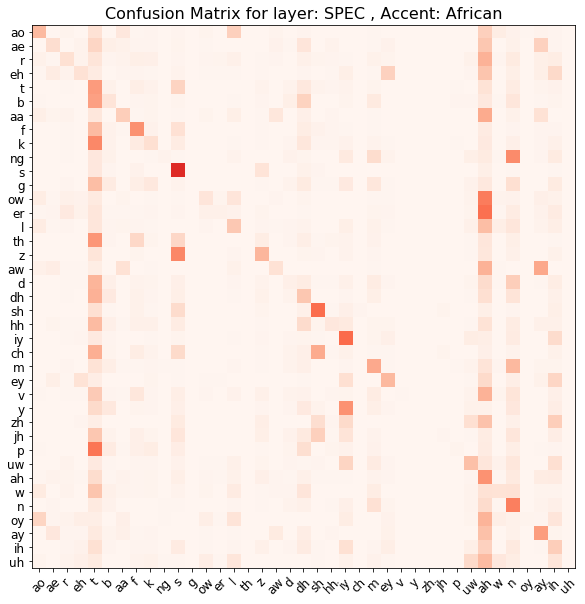

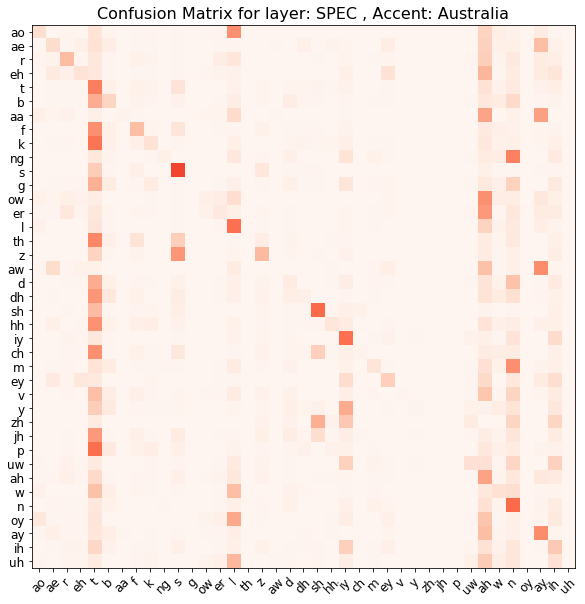

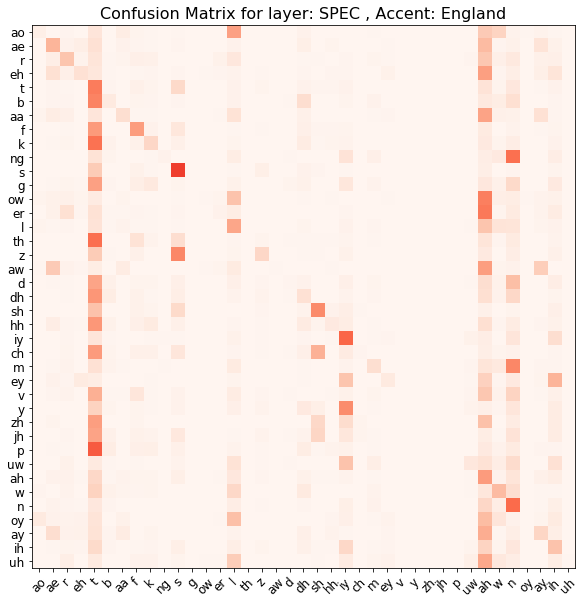

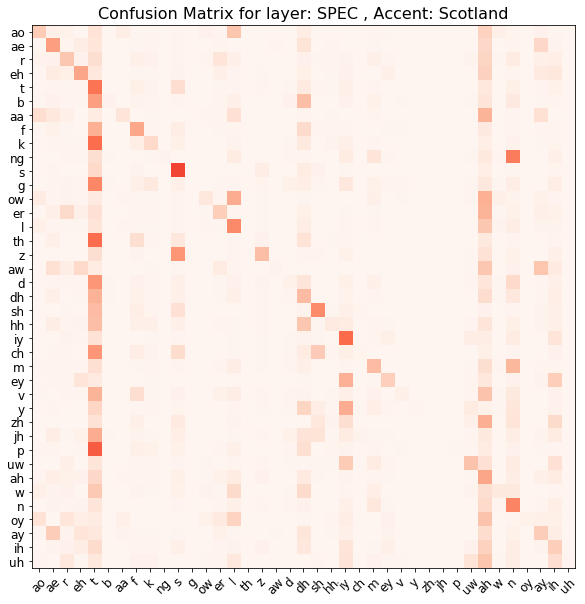

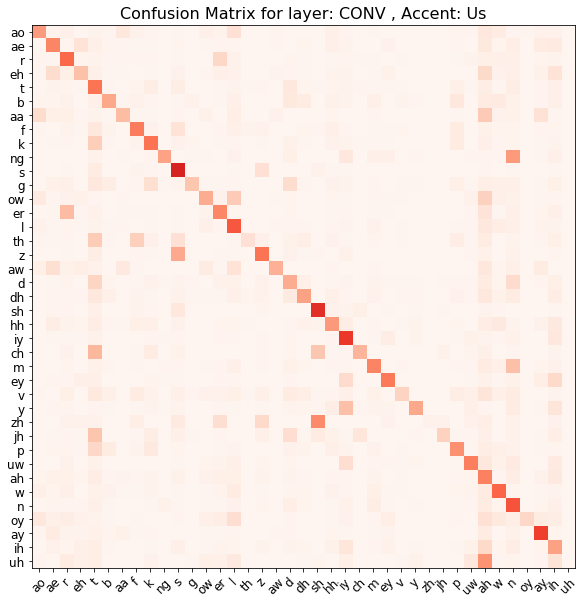

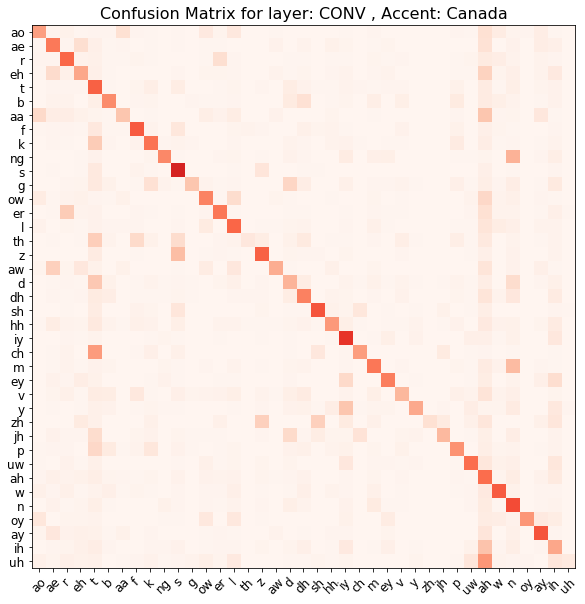

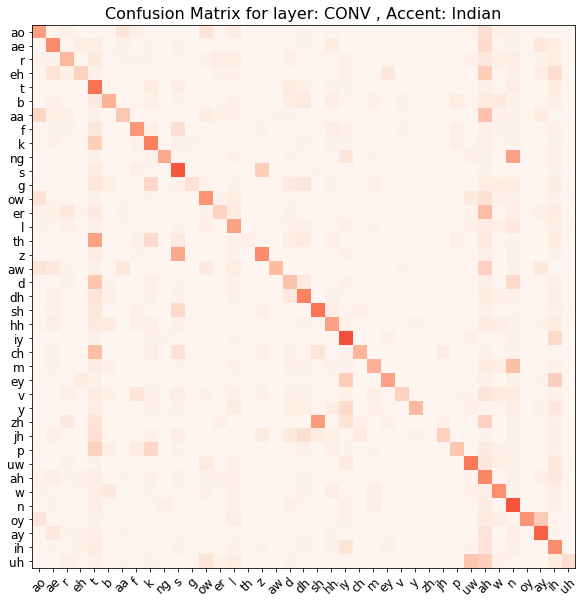

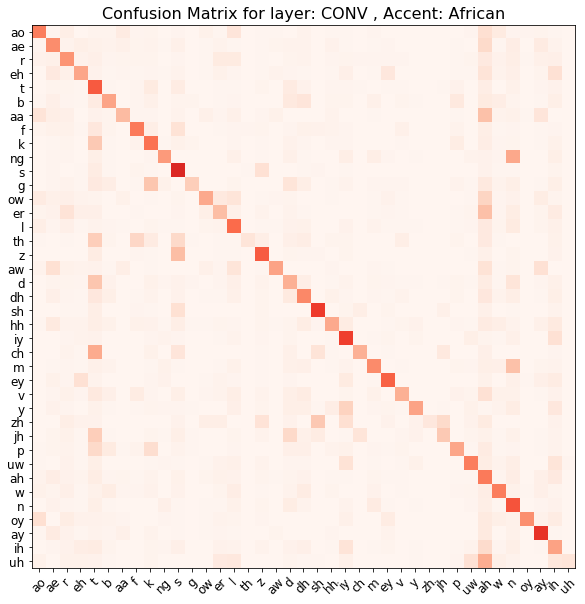

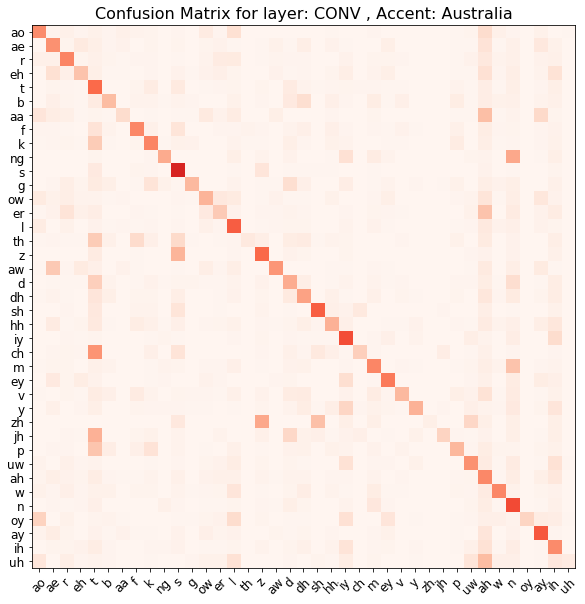

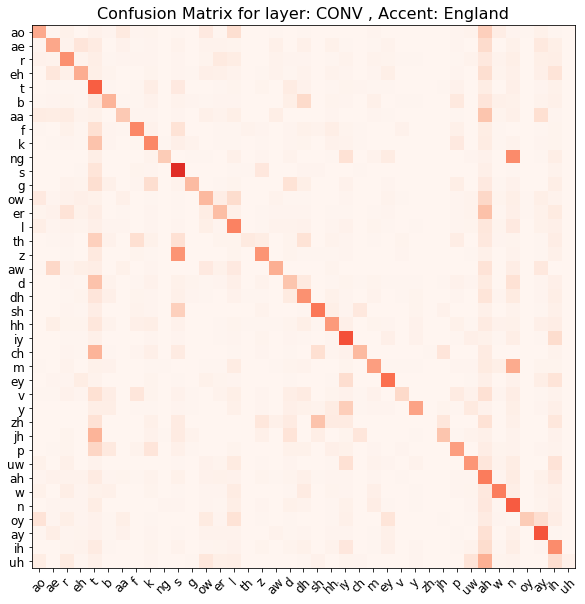

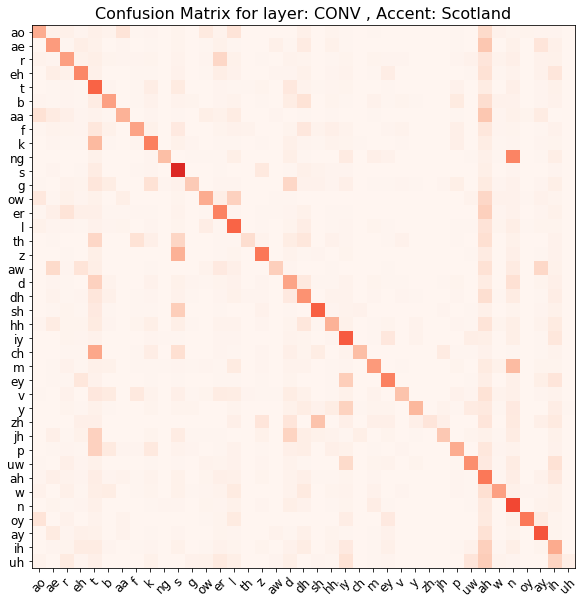

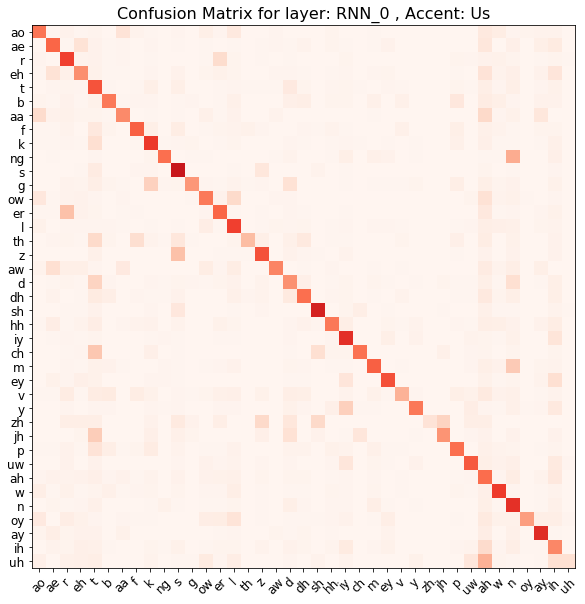

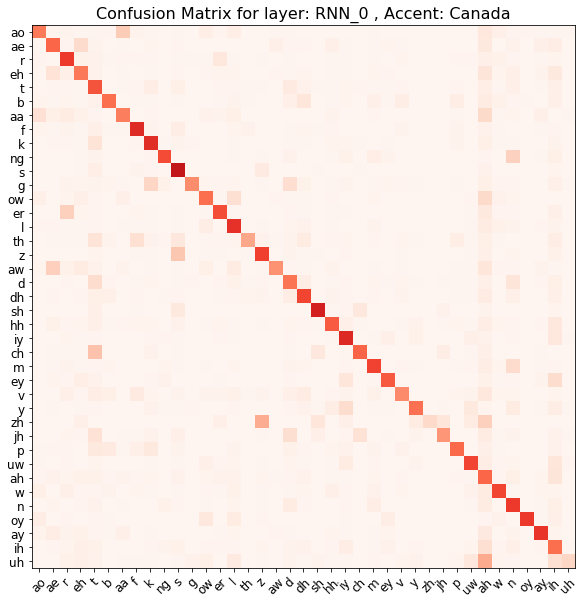

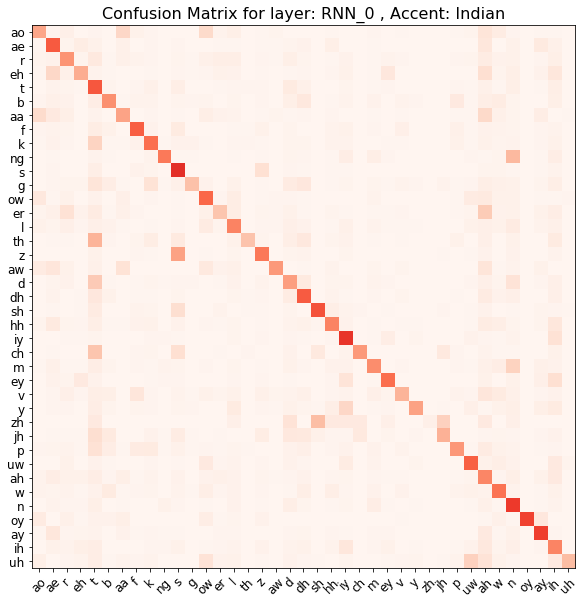

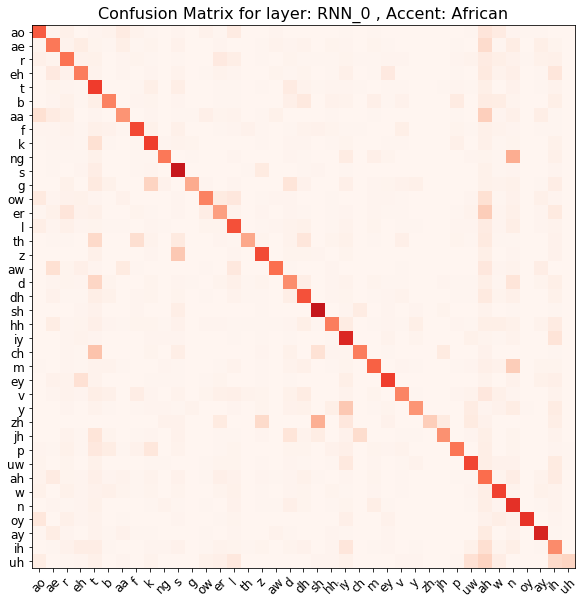

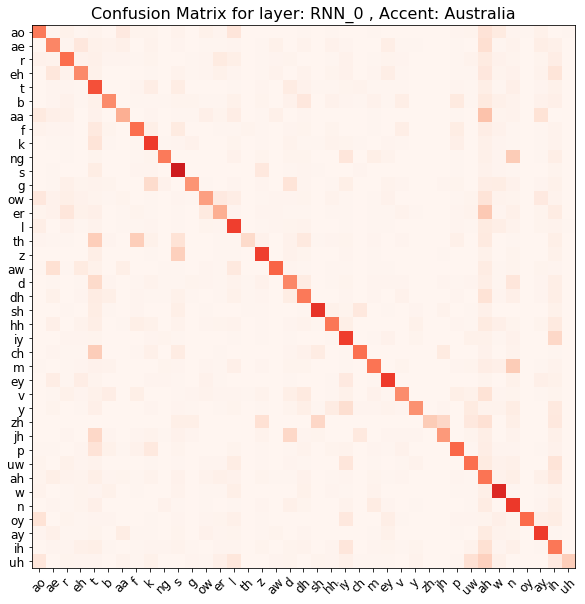

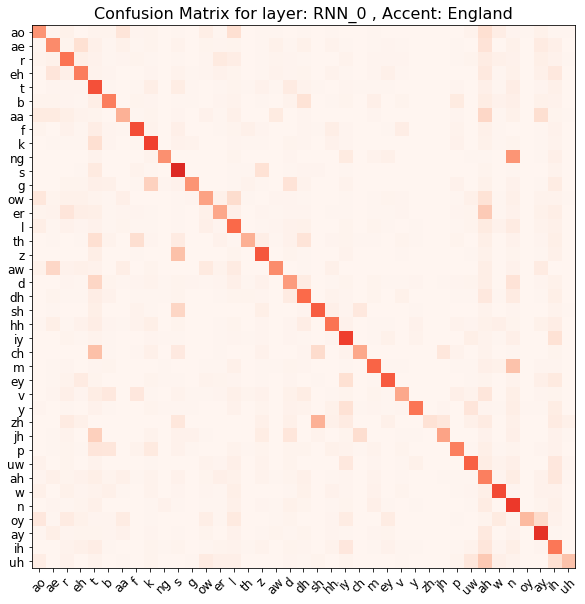

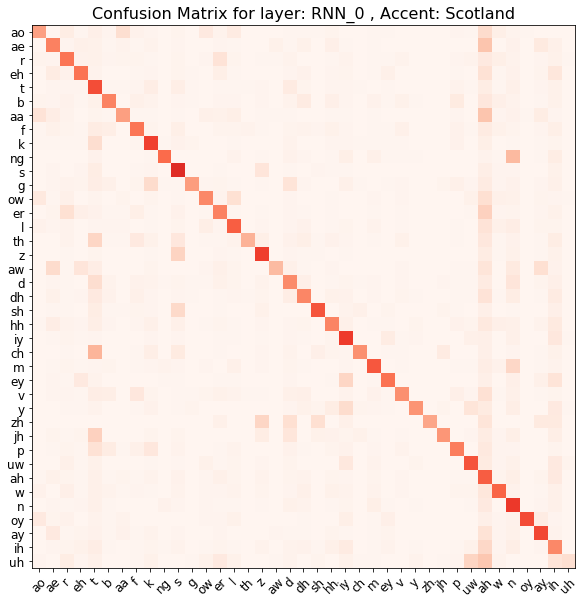

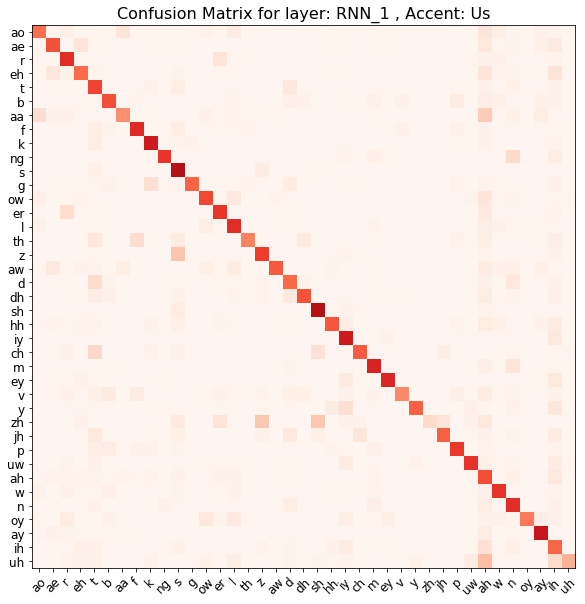

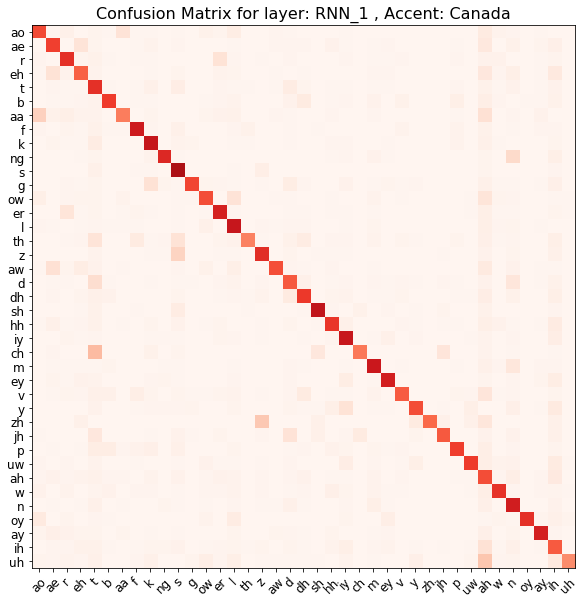

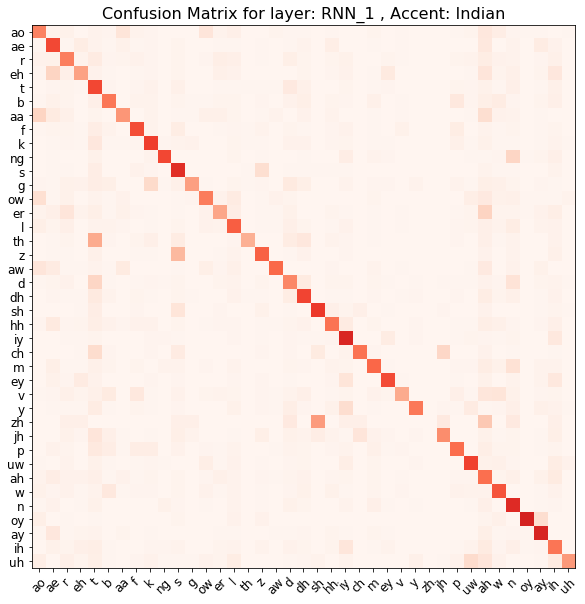

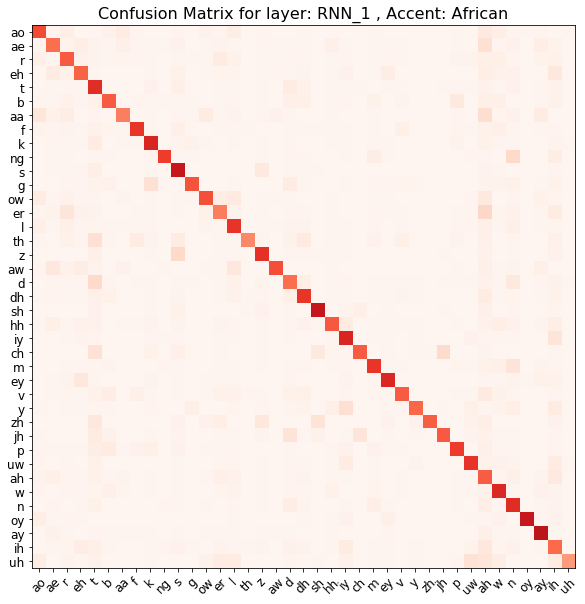

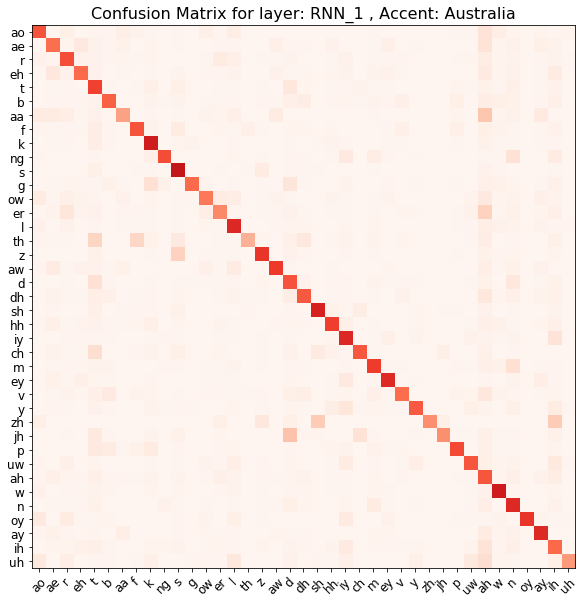

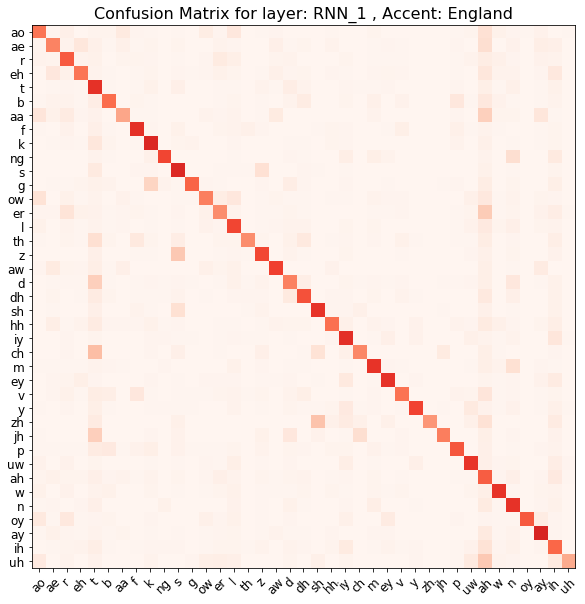

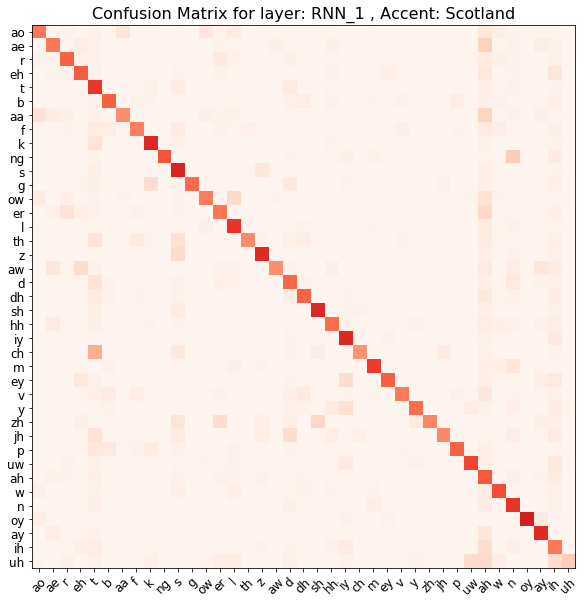

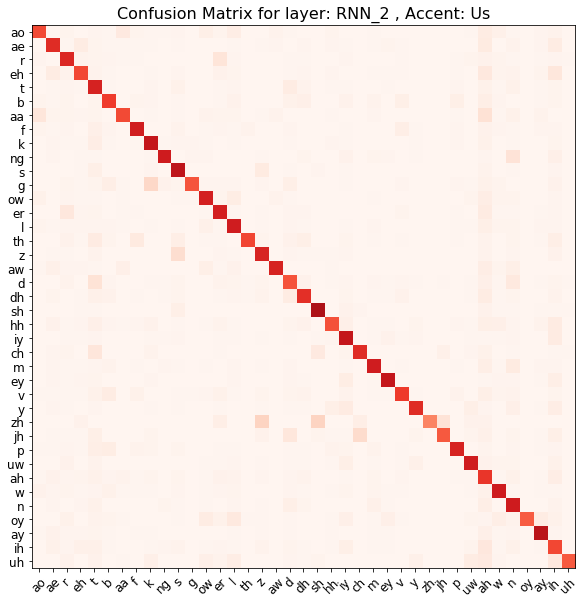

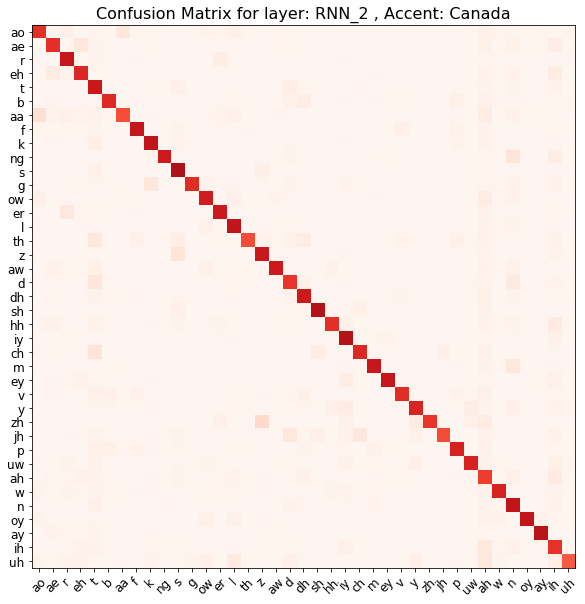

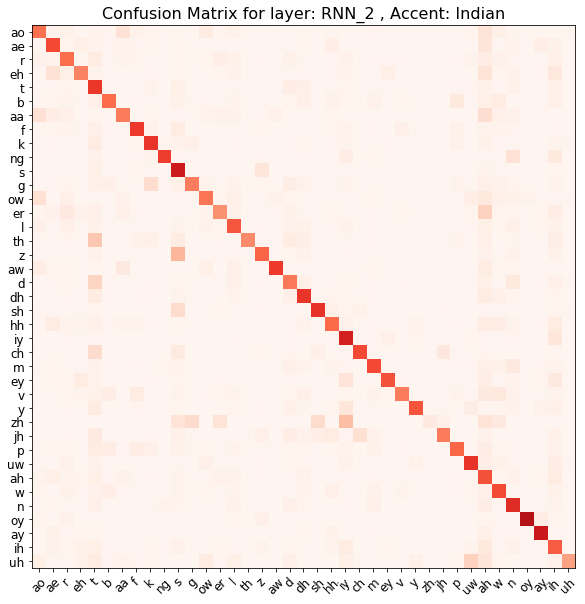

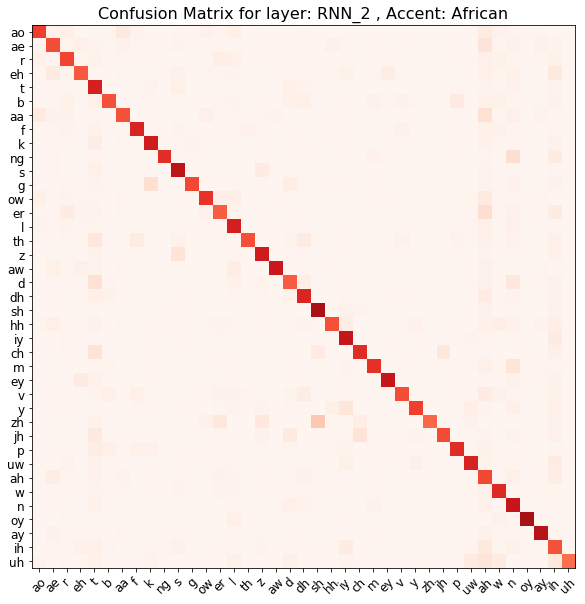

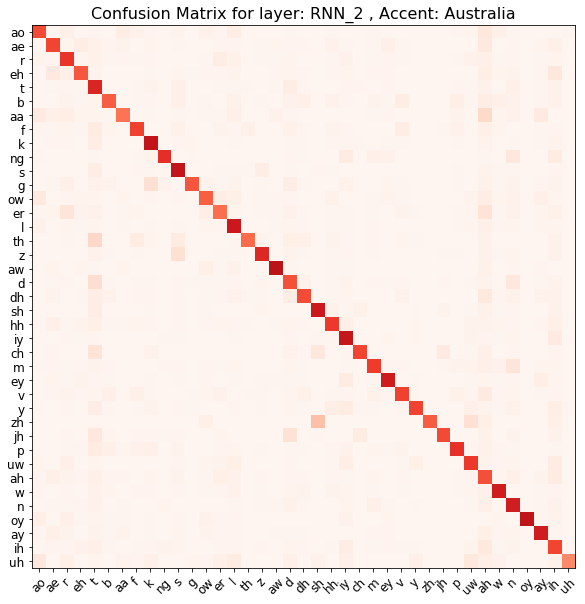

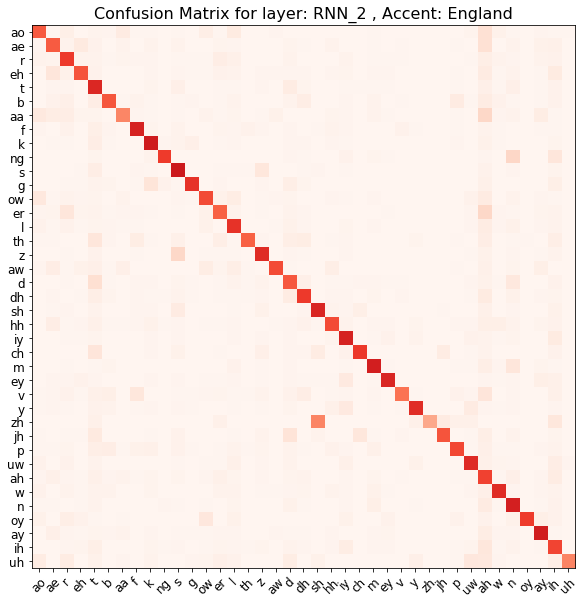

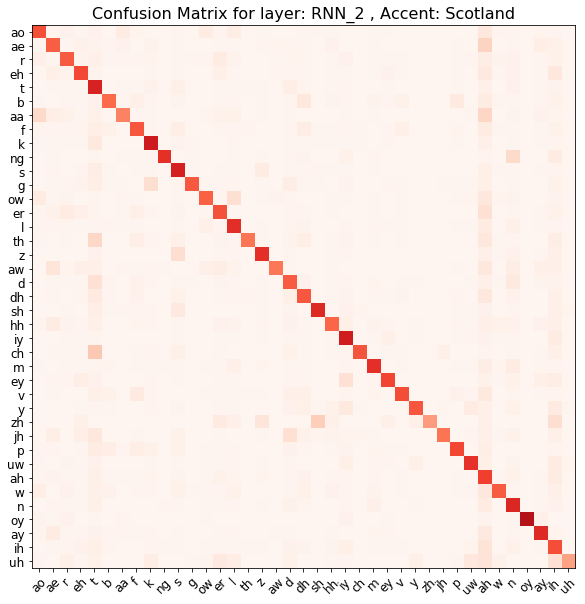

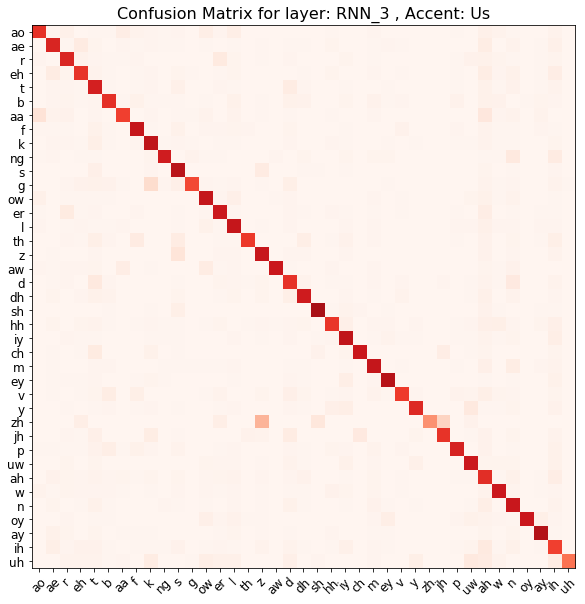

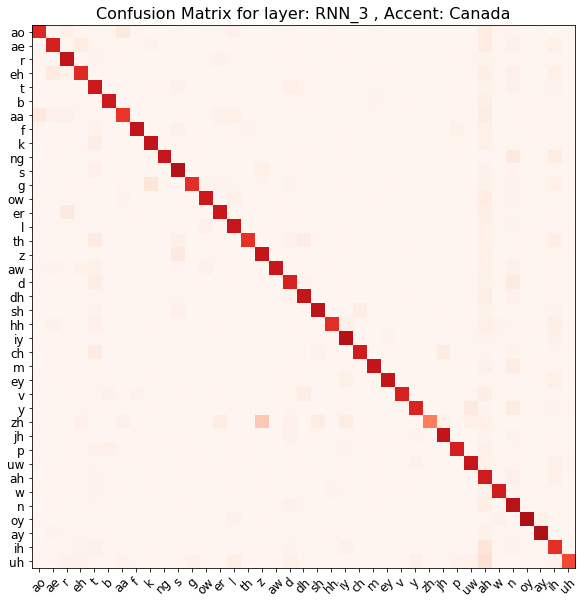

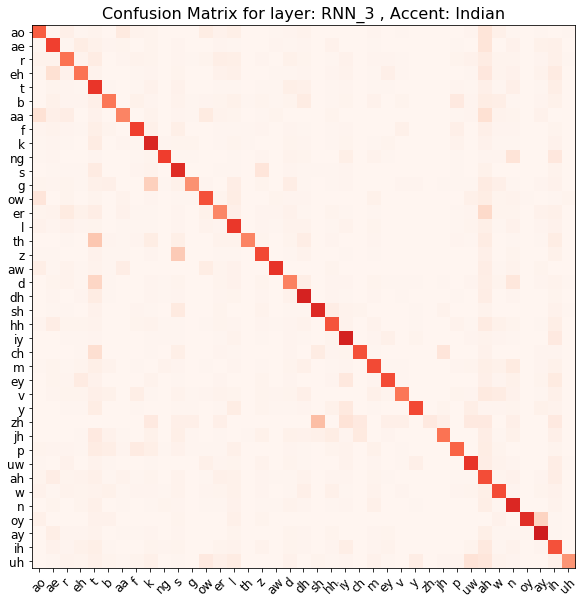

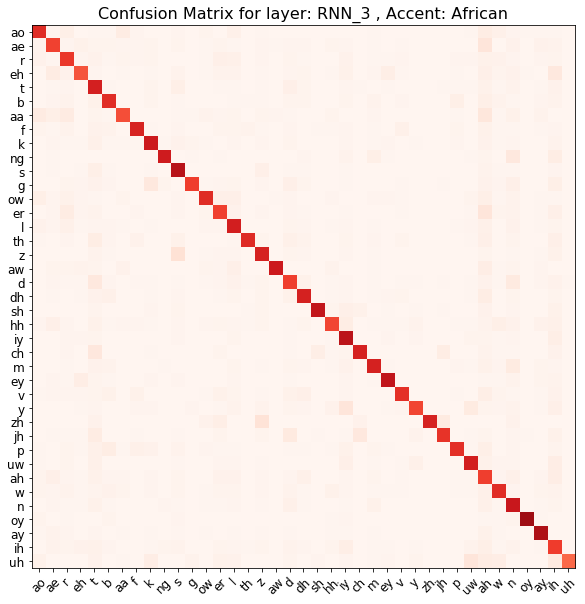

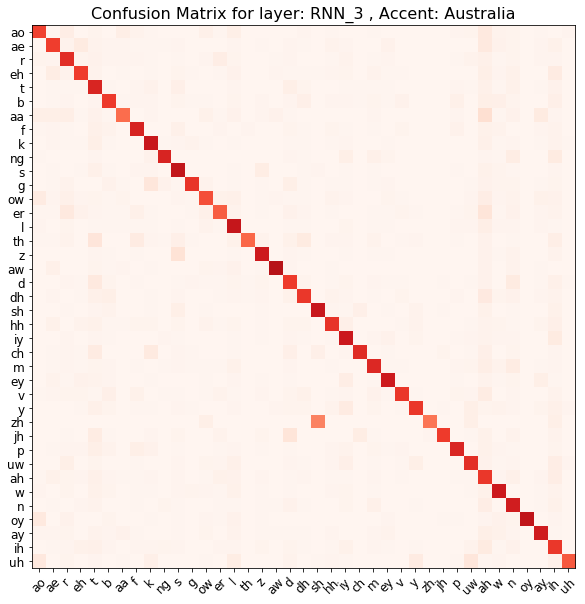

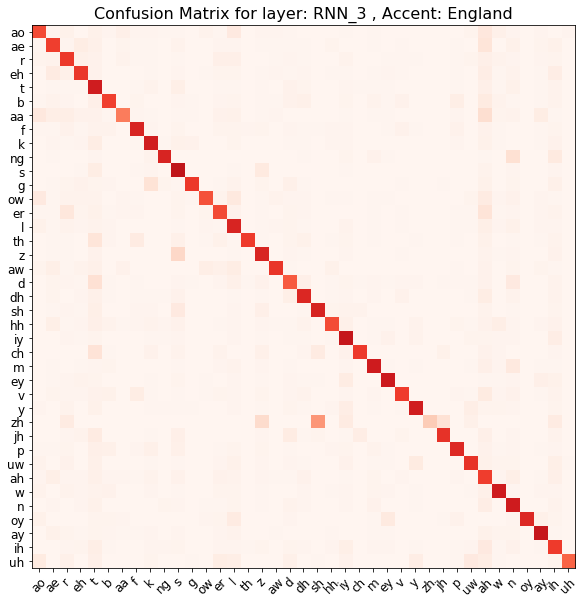

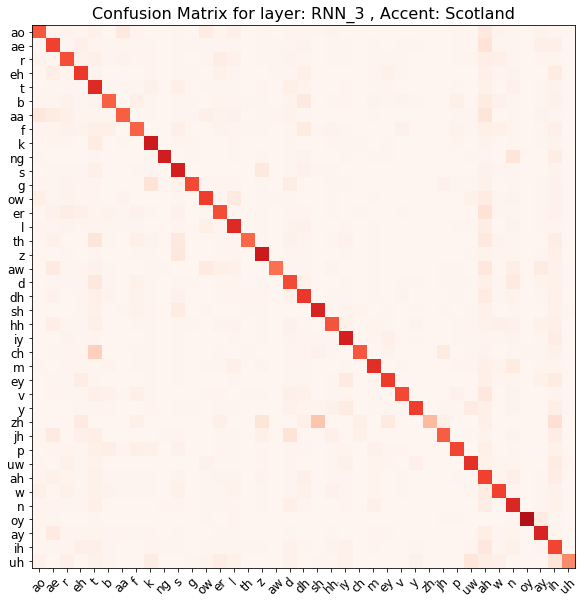

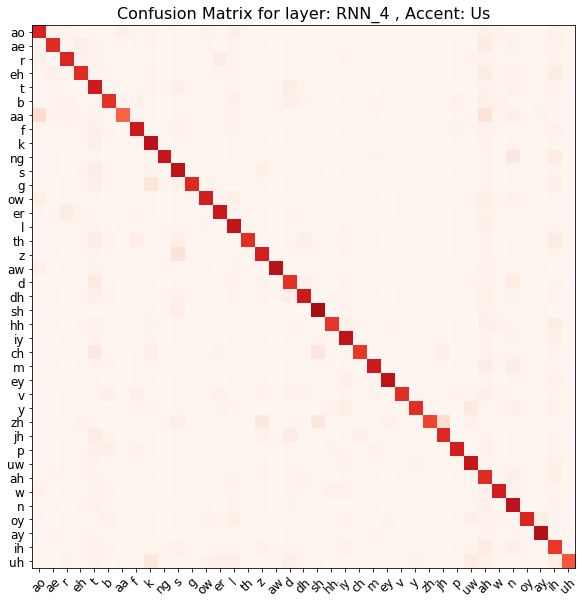

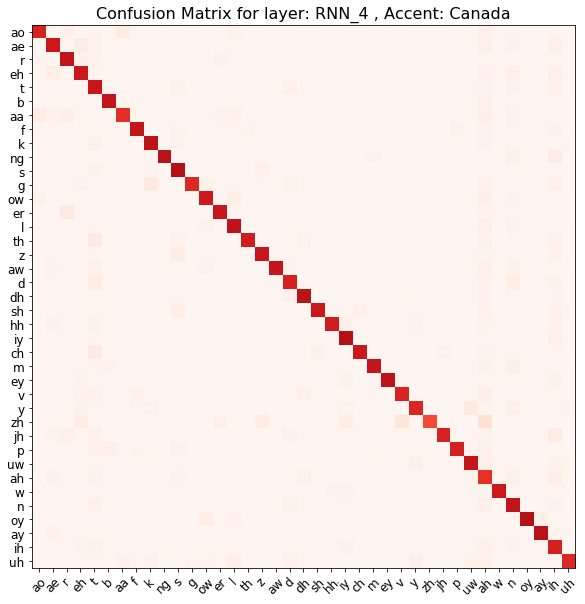

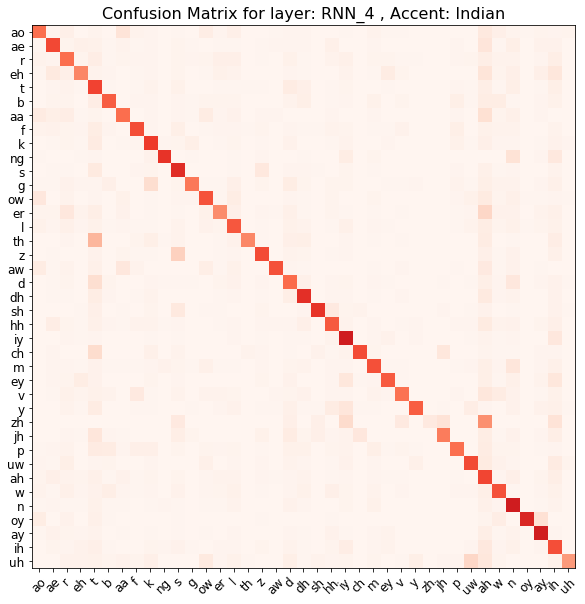

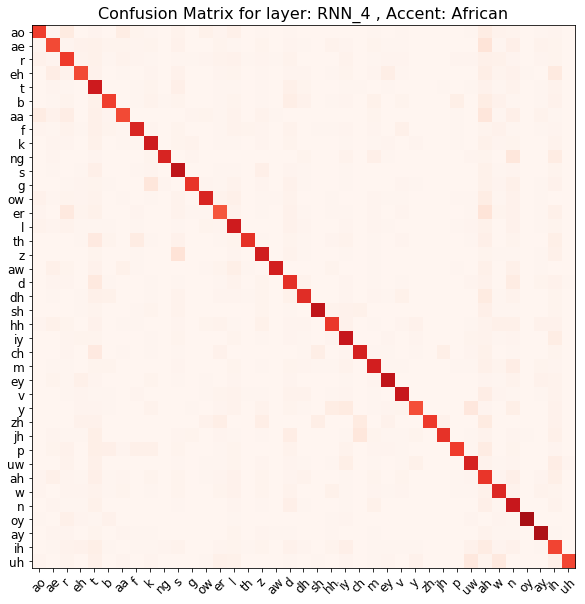

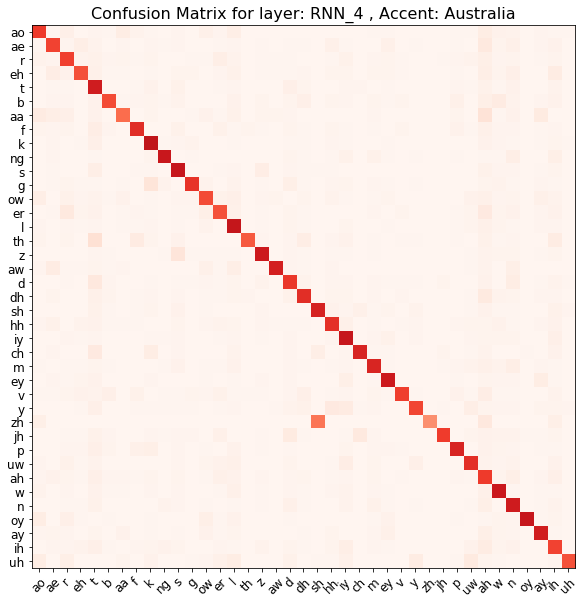

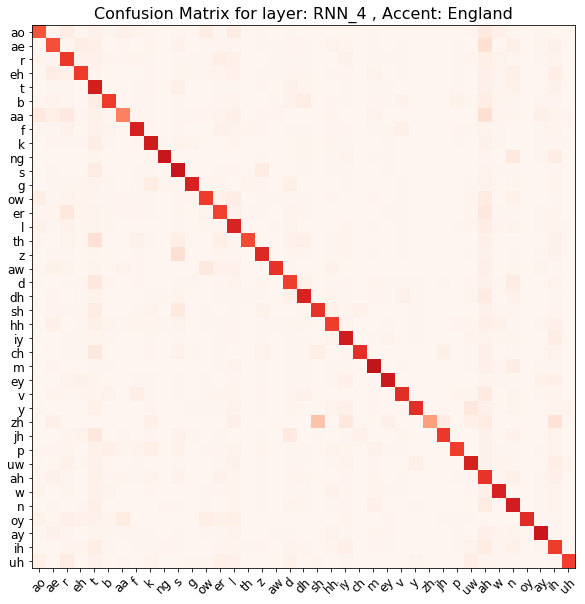

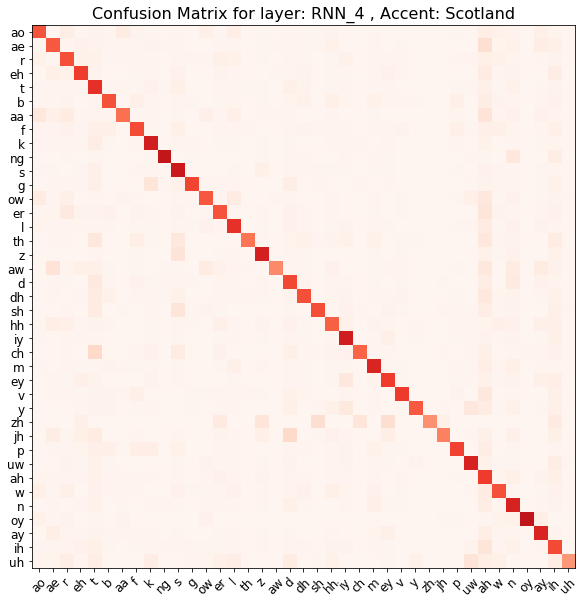

In [16]:
accents = ['us','canada','indian','african','australia','england','scotland']
layers = ['spec', 'conv', 'rnn_0', 'rnn_1', 'rnn_2', 'rnn_3', 'rnn_4']
for layer in layers:
    for accent in accents:
        plot_confusion_matrix(layer, accent)
        
    


### Change Distrubution of Phones

In [13]:
mix = {'n': 0.029333333333333333, 'w': 0.034666666666666665, 'q': 0.013333333333333334, 'aa': 0.02666666666666667, 'z': 0.010666666666666666, 'er': 0.018666666666666668, 'th': 0.0026666666666666666, 'f': 0.018666666666666668, 'ay': 0.013333333333333334, 'r': 0.048, 'ah': 0.013333333333333334, 'dx': 0.013333333333333334, 'em': 0.0026666666666666666, 'dh': 0.016, 'ey': 0.016, 's': 0.056, 'ch': 0.013333333333333334, 'ux': 0.0026666666666666666, 'sh': 0.013333333333333334, 't': 0.08266666666666667, 'm': 0.024, 'oy': 0.0026666666666666666, 'eh': 0.021333333333333333, 'ae': 0.016, 'l': 0.042666666666666665, 'b': 0.04, 'pau': 0.010666666666666666, 'g': 0.021333333333333333, 'el': 0.005333333333333333, 'uw': 0.005333333333333333, 'ih': 0.024, 'uh': 0.005333333333333333, 'en': 0.005333333333333333, 'jh': 0.008, 'ix': 0.048, 'iy': 0.042666666666666665, 'v': 0.010666666666666666, 'ax': 0.04266666666666667, 'hh': 0.005333333333333333, 'k': 0.055999999999999994, 'y': 0.0026666666666666666, 'p': 0.029333333333333336, 'ao': 0.02666666666666667, 'd': 0.021333333333333333, 'epi': 0.008, 'nx': 0.010666666666666666, 'ow': 0.016, 'ng': 0.0026666666666666666}
mix2 = {k:1 for k in mix.keys()}

In [14]:
def mixture(layer, accent):
    f = open('confusion_{}_{}.json'.format(layer,accent), 'r+')
    confusion = json.load(f)
    conf_list = np.zeros((39,39), dtype= float)
    for k,v in confusion.items():
            #print(k)
            for p, val in v.items():
            #print(k,p,val)
            #print(valid_phones.index(k),valid_phones.index(p))
                conf_list[valid_phones.index(k)][valid_phones.index(p)] = val
    row_sums = conf_list.sum(axis = 1)
    normalized_conf  = conf_list / row_sums[:, np.newaxis]
    accuracy = {}
    for p in valid_phones:
        p_idx = valid_phones.index(p)
        accuracy[p] = normalized_conf[p_idx][p_idx]
    overall = 0
    total_mix = 0

    for p in valid_phones:
        if p not in mix.keys():
            #print(p)
            continue
        overall += accuracy[p]*mix[p] 
        total_mix += mix[p]
    return 100*overall/total_mix


In [15]:
layers = ['spec', 'conv', 'rnn_0', 'rnn_1', 'rnn_2', 'rnn_3', 'rnn_4']
accents = ['us', 'canada', 'indian', 'scotland', 'african','australia', 'england']
final = {}
for accent in accents:
    accent_l = []
    for layer in layers:
        accent_l.append(mixture(layer,accent))
    final[accent] = accent_l
        


In [16]:
print(final)

{'australia': [23.882295786573977, 40.78649086376827, 52.12412804434393, 60.08082494289764, 65.63090422312813, 68.47256208897413, 68.38197960567067], 'scotland': [24.989233448726548, 41.07233760533532, 50.08588897601144, 56.78134294704093, 61.57004643478668, 63.527129107482416, 62.69628429556018], 'canada': [27.24499630487268, 46.11097761121334, 57.46418283302521, 66.48617943037304, 73.46193070804743, 75.4186165202351, 76.26660853853309], 'us': [25.924799327602496, 43.73741576267092, 54.39733301160252, 62.9184109263565, 69.64706350773255, 72.45295598379782, 72.99207990439862], 'indian': [20.500553276845217, 36.318168901795026, 45.59810031580054, 52.66461085154507, 57.29573164394779, 58.163587934135016, 57.08111626729552], 'england': [23.322689223131185, 39.98607629674601, 49.69668606472542, 57.20639924890041, 64.21994208951006, 67.72707793306387, 67.75636556337237], 'african': [23.415052030622867, 43.48734563485598, 54.148734159533916, 61.872968075575145, 67.28519083167093, 69.72188426

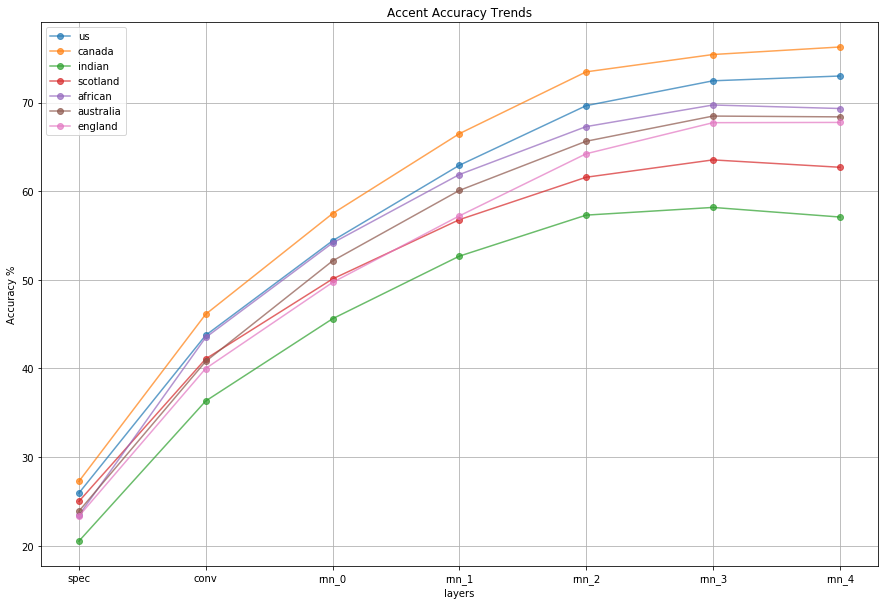

In [17]:
objects = ['spec', 'conv', 'rnn_0', 'rnn_1', 'rnn_2', 'rnn_3', 'rnn_4']
#objects.sort()
        #print()
y_pos = np.arange(len(objects))
fig = plt.figure(figsize = (15,10))
for accent in accents:
    plt.plot(y_pos, final[accent],'-o', alpha=0.7, label =accent)
# plt.plot(y_pos, us,'-o', alpha=0.7, label = 'us')
# plt.plot(y_pos, can, '-o',alpha=0.7, label = 'canada')
# plt.plot(y_pos, ind, '-o',alpha=0.7, label= 'indian')
# plt.plot(y_pos, scot, '-o',alpha=0.7, label= 'scotland')
# plt.plot(y_pos, eng, '-o',alpha=0.7, label = 'england')
# plt.plot(y_pos, aus, '-o',alpha=0.7, label = 'australia')
# plt.plot(y_pos, afri, '-o',alpha=0.7, label = 'african')
plt.xticks(y_pos, objects)
#plt.ylim(ymin = 0)
#plt.axhline(14.28, linewidth=1, color='k')
plt.grid()
plt.ylabel('Accuracy %')
plt.xlabel('layers')
plt.title('Accent Accuracy Trends')
plt.legend()
plt.show()